<a href="https://colab.research.google.com/github/villafue/Machine_Learning_Notes/blob/master/Supervised_Learning/Supervised%20Learning%20with%20Scikit-Learn/Time%20Series%20Analysis%20in%20Python/2%20Some%20Simple%20Time%20Series/2%20Some_Simple_Time_Series.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Some Simple Time Series

In this chapter you'll learn about some simple time series models. These include white noise and a random walk.

# Autocorrelation Function

1. Autocorrelation Function
The sample autocorrelation function, or ACF,

2. Autocorrelation Function
shows not only the lag-one autocorrelation from the last chapter, but the entire autocorrelation function for different lags. Any significant non-zero autocorrelations implies that the series can be forecast from the past.

3. ACF Example 1: Simple Autocorrelation Function
This autocorrelation function implies that you can forecast the next value of the series from the last two values, since the lag-one and lag-two autocorrelations differ from zero.

4. ACF Example 2: Seasonal Earnings
Consider the time series of quarterly earnings of the company H&R Block. As we mentioned last chapter, a vast majority of their earnings occurs in the quarter that taxes are due. In this case, you can clearly see a seasonal pattern in the quarterly data on the left, and the autocorrelation function on the right shows strong autocorrelation at lags 4, 8, 12, 16, and 20

5. ACF Example 3: Useful for Model Selection
The ACF can also be useful for selecting a parsimonious model for fitting the data. In this example, the pattern of the autocorrelation suggests a model for the series that will be discussed in the next chapter.

6. Plot ACF in Python
plot_acf is the statsmodels function for plotting the autocorrelation function. The input x is a series or array. The argument lags indicates how many lags of the autocorrelation function will be plotted. The alpha argument sets the width of the confidence interval, which is discussed on the next slide.

7. Confidence Interval of ACF
Here is an ACF plot that contains confidence intervals for each lag, which is the blue region in the figure.

8. Confidence Interval of ACF
In plot_acf, the argument alpha determines the width of the confidence intervals. For example, if alpha equals 0-point-05, that means that if the true autocorrelation at that lag is zero, there is only a 5% chance the sample autocorrelation will fall outside that window. You will get a wider confidence interval if you set alpha lower, or if you have fewer observations. An approximation to the width of the 95% confidence intervals, if you make some simplifying assumptions, is plus or minus 2 over the square root of the number of observations in your series. Incidentally, if you don't want to see confidence intervals in your plot, set alpha equal to one.

9. ACF Values Instead of Plot
Besides plotting the ACF, you can also extract its numerical values using a similar Python function, acf, instead of plot_acf.

10. Let's practice!
Now it's your turn.

# Taxing Exercise: Compute the ACF

In the last chapter, you computed autocorrelations with one lag. Often we are interested in seeing the autocorrelation over many lags. The quarterly earnings for H&R Block (ticker symbol HRB) is plotted on the right, and you can see the extreme cyclicality of its earnings. A vast majority of its earnings occurs in the quarter that taxes are due.

You will compute the array of autocorrelations for the H&R Block quarterly earnings that is pre-loaded in the DataFrame HRB. Then, plot the autocorrelation function using the plot_acf module. This plot shows what the autocorrelation function looks like for cyclical earnings data. The ACF at lag=0 is always one, of course. In the next exercise, you will learn about the confidence interval for the ACF, but for now, suppress the confidence interval by setting alpha=1.

Instructions

1. Import the acf module and plot_acf module from statsmodels.

2. Compute the array of autocorrelations of the quarterly earnings data in DataFrame HRB.

3. Plot the autocorrelation function of the quarterly earnings data in HRB, and pass the argument alpha=1 to suppress the confidence interval.


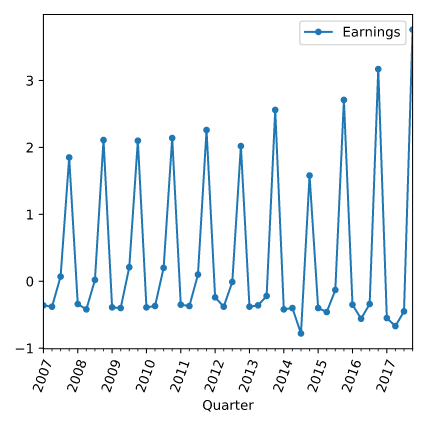

In [ ]:
# Import the acf module and the plot_acf module from statsmodels
from statsmodels.tsa.stattools import acf
from statsmodels.graphics.tsaplots import plot_acf

# Compute the acf array of HRB
acf_array = acf(HRB)
print(acf_array)

# Plot the acf function
plot_acf(HRB, alpha=1)
plt.show()

'''
<script.py> output:
    [ 1.         -0.22122696 -0.39856504 -0.26615093  0.83479804 -0.1901038
     -0.3475634  -0.23140368  0.71995993 -0.15661007 -0.29766783 -0.22097189
      0.61656933 -0.15022869 -0.27922022 -0.22465946  0.5725259  -0.08758288
     -0.24075584 -0.20363054  0.4797058  -0.06091139 -0.20935484 -0.18303202
      0.42481275 -0.03352559 -0.17471087 -0.16384328  0.34341079 -0.01734364
     -0.13820811 -0.12232172  0.28407164 -0.01927656 -0.11757974 -0.10386933
      0.20156485 -0.0120634  -0.07509539 -0.0707104   0.10222029]
'''

Conclusion

Notice the strong positive autocorrelation at lags 4, 8, 12, 16,20, ...

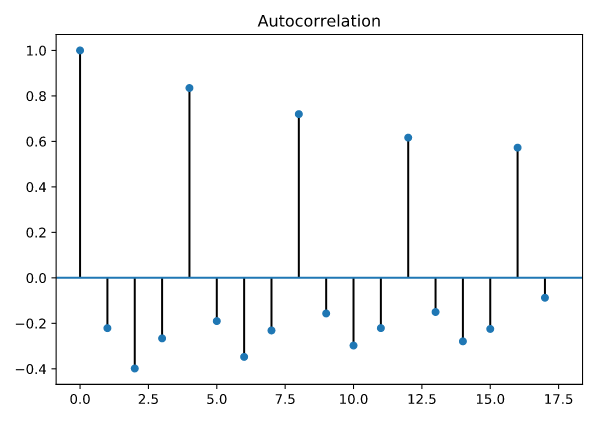

# Are We Confident This Stock is Mean Reverting?
In the last chapter, you saw that the autocorrelation of MSFT's weekly stock returns was -0.16. That autocorrelation seems large, but is it statistically significant? In other words, can you say that there is less than a 5% chance that we would observe such a large negative autocorrelation if the true autocorrelation were really zero? And are there any autocorrelations at other lags that are significantly different from zero?

Even if the true autocorrelations were zero at all lags, in a finite sample of returns you won't see the estimate of the autocorrelations exactly zero. In fact, the standard deviation of the sample autocorrelation is  where  is the number of observations, so if , for example, the standard deviation of the ACF is 0.1, and since 95% of a normal curve is between +1.96 and -1.96 standard deviations from the mean, the 95% confidence interval is . This approximation only holds when the true autocorrelations are all zero.

You will compute the actual and approximate confidence interval for the ACF, and compare it to the lag-one autocorrelation of -0.16 from the last chapter. The weekly returns of Microsoft is pre-loaded in a DataFrame called returns.

Instructions

1. Recompute the autocorrelation of weekly returns in the Series 'Adj Close' in the returns DataFrame.

2. Find the number of observations in the returns DataFrame using the len() function.

3. Approximate the 95% confidence interval of the estimated autocorrelation. The math function sqrt() has been imported and can be used.

4. Plot the autocorrelation function of returns using plot_acf that was imported from statsmodels. Set alpha=0.05 for the confidence intervals (that's the default) and lags=20.

Hint

To plot the autocorrelation function of returns, use `plot_acf(returns, alpha=0.05, lags=20)` and the approximate confidence interval is `conf = 1.96/sqrt(nobs)`

In [ ]:
# Import the plot_acf module from statsmodels and sqrt from math
from statsmodels.graphics.tsaplots import plot_acf
from math import sqrt

# Compute and print the autocorrelation of MSFT weekly returns
autocorrelation = returns['Adj Close'].autocorr()
print("The autocorrelation of weekly MSFT returns is %4.2f" %(autocorrelation))

# Find the number of observations by taking the length of the returns DataFrame
nobs = len(returns)

# Compute the approximate confidence interval
conf = 1.96/sqrt(nobs)
print("The approximate confidence interval is +/- %4.2f" %(conf))

# Plot the autocorrelation function with 95% confidence intervals and 20 lags using plot_acf
plot_acf(returns, alpha=0.05, lags = 20)
plt.show()

'''
<script.py> output:
    The autocorrelation of weekly MSFT returns is -0.16
    The approximate confidence interval is +/- 0.12
'''

Conclusion

Notice that the autocorrelation with lag 1 is significantly negative, but none of the other lags are significantly different from zero

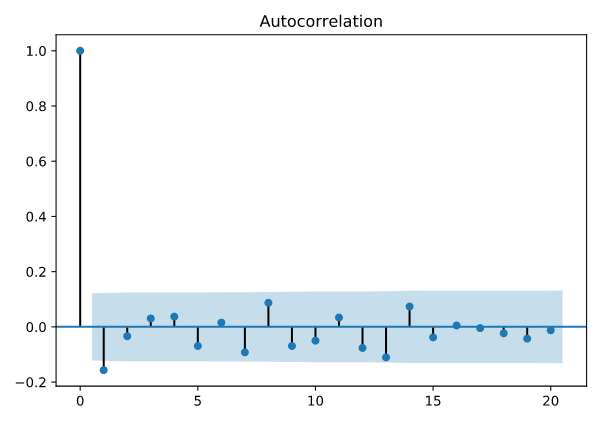

# White Noise

1. White Noise
Although people define white noise slightly differently, a general definition

2. What is White Noise?
is that it is a series with mean that is constant with time, a variance that is also constant with time, and zero autocorrelation at all lags. There are several special cases of White Noise. For example, if the data is white noise but also has a normal, or Gaussian, distribution, then it is called Gaussian White Noise.

3. Simulating White Noise
numpy random normal creates an array of normally distributed random numbers. The loc argument is the mean and the scale argument is the standard deviation. This is one way to generate a white noise series.

4. What Does White Noise Look Like?
And here is a plot of the white noise series.

5. Autocorrelation of White Noise
And all the autocorrelations of a white noise series are zero. The returns on the stock market are pretty close to a white noise process.

6. Stock Market Returns: Close to White Noise
Here is the autocorrelation function for the S&P500. Notice that there are pretty much no lags where the autocorrelation is significantly different from zero.

7. Let's practice!
Time to put this into practice.

# Can't Forecast White Noise

A white noise time series is simply a sequence of uncorrelated random variables that are identically distributed. Stock returns are often modeled as white noise. Unfortunately, for white noise, we cannot forecast future observations based on the past - autocorrelations at all lags are zero.

You will generate a white noise series and plot the autocorrelation function to show that it is zero for all lags. You can use np.random.normal() to generate random returns. For a Gaussian white noise process, the mean and standard deviation describe the entire process.

Plot this white noise series to see what it looks like, and then plot the autocorrelation function.

Instructions

1. Generate 1000 random normal returns using `np.random.normal()` with mean 2% (0.02) and standard deviation 5% (0.05), where the argument for the mean is `loc` and the argument for the standard deviation is `scale`.

2. Verify the mean and standard deviation of returns using `np.mean()` and `np.std()`.

3. Plot the time series.

4. Plot the autocorrelation function using `plot_acf` with `lags=20`.

In [ ]:
# Import the plot_acf module from statsmodels
from statsmodels.graphics.tsaplots import plot_acf

# Simulate white noise returns
returns = np.random.normal(loc=0.02, scale=0.05, size=1000)

# Print out the mean and standard deviation of returns
mean = np.mean(returns)
std = np.std(returns)
print("The mean is %5.3f and the standard deviation is %5.3f" %(mean,std))

# Plot returns series
plt.plot(returns)
plt.show()

# Plot autocorrelation function of white noise returns
plot_acf(returns, lags=20)
plt.show()

'''
<script.py> output:
    The mean is 0.018 and the standard deviation is 0.050
'''

Conclusion

Notice that for a white noise time series, all the autocorrelations are close to zero, so the past will not help you forecast the future.

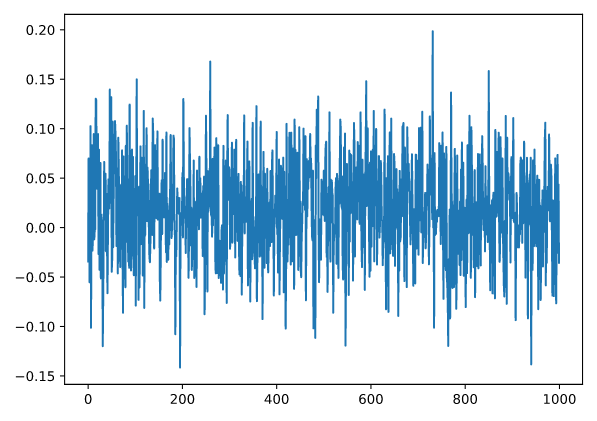

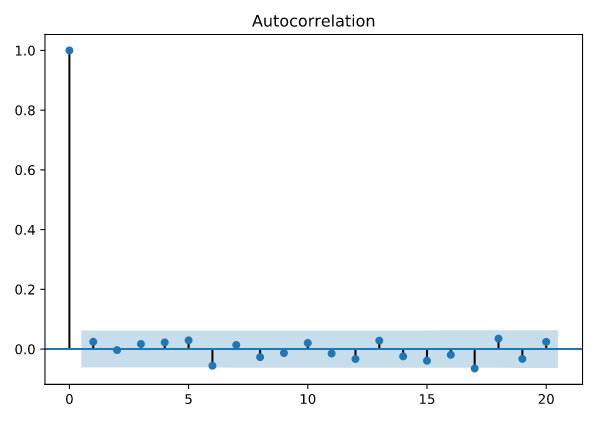

# Random Walk

1. Random Walk
In a random walk,

2. What is a Random Walk?
today's price is equal to yesterday's price plus some noise. Here is a plot of a simulated random walk.

3. What is a Random Walk?
The change in price of a random walk is just White Noise. Incidentally, if prices are in logs, then the difference in log prices is one way to measure returns. The bottom line is that if stock *prices* follow a random walk, then stock *returns* are White Noise. You can't forecast a random walk. The best guess for tomorrow's price is simply today's price.

4. What is a Random Walk?
In a random walk with drift, prices on average drift by mu every period. And the change in price for a random walk with drift is still white noise but with a mean of mu. So if we now think of stock prices as a random walk with drift, then the returns are still white noise, but with an average return of mu instead of zero.

5. Statistical Test for Random Walk
To test whether a series like stock prices follows a random walk, you can regress current prices on lagged prices. If the slope coefficient, beta, is not significantly different from one, then we cannot reject the null hypothesis that the series is a random walk. However, if the slope coefficient is significantly less than one, then we can reject the null hypothesis that the series is a random walk.

6. Statistical Test for Random Walk
An identical way to do that test is to regress the difference in prices on the lagged price, and instead of testing whether the slope coefficient is 1, now we test whether it is zero.

7. Statistical Test for Random Walk
This is called the "Dickey-Fuller" test. If you add more lagged prices on the right hand side, then it's called the Augmented Dickey-Fuller test.

8. ADF Test in Python
statsmodels has a function, adfuller, for performing the Augmented Dickey-Fuller test.

9. Example: Is the S&P500 a Random Walk?
As an example, let's run the Augmented Dickey-Fuller test on a time series of S&P500 prices using the adfuller function. The results are stored in results. The main output we're interested in is the p-value of the test. If the p-value is less than 5%, we can reject the null hypothesis that the series is a random walk with 95% confidence. In this case, the p-value is much higher than point-05 - it's 0-point-78. Therefore, we cannot reject the null hypothesis that the S&P500 is a random walk. You can also print out the full output of the test, which gives other information, like the number of observations (1257), the test statistic (-point-917) and the critical values of the test statistic for various alphas - 1%, 10%, and 5%.

10. Let's practice!
Now it's your turn.

# Generate a Random Walk
Whereas stock returns are often modeled as white noise, stock prices closely follow a random walk. In other words, today's price is yesterday's price plus some random noise.

You will simulate the price of a stock over time that has a starting price of 100 and every day goes up or down by a random amount. Then, plot the simulated stock price. If you hit the "Run Code" code button multiple times, you'll see several realizations.

Instructions

1. Generate 500 random normal "steps" with mean=0 and standard deviation=1 using np.random.normal(), where the argument for the mean is loc and the argument for the standard deviation is scale.

2. Simulate stock prices P:
 - Cumulate the random steps using the numpy .cumsum() method
 - Add 100 to P to get a starting stock price of 100.

3. Plot the simulated random walk


In [ ]:
# Generate 500 random steps with mean=0 and standard deviation=1
steps = np.random.normal(loc=0, scale=1, size=500)

# Set first element to 0 so that the first price will be the starting stock price
steps[0]=0

# Simulate stock prices, P with a starting price of 100
P = 100 + np.cumsum(steps)

# Plot the simulated stock prices
plt.plot(P)
plt.title("Simulated Random Walk")
plt.show()

Conclusion

The simulated price series you plotted should closely resemble a random walk.

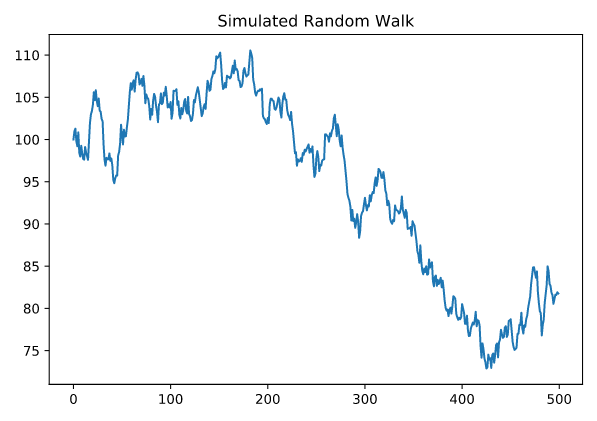


# Get the Drift
In the last exercise, you simulated stock prices that follow a random walk. You will extend this in two ways in this exercise.

 - You will look at a random walk with a drift. Many time series, like stock prices, are random walks but tend to drift up over time.

 - In the last exercise, the noise in the random walk was additive: random, normal changes in price were added to the last price. However, when adding noise, you could theoretically get negative prices. Now you will make the noise multiplicative: you will add one to the random, normal changes to get a total return, and multiply that by the last price.

Instructions

1. Generate 500 random normal multiplicative "steps" with mean 0.1% and standard deviation 1% using np.random.normal(), which are now returns, and add one for total return.

2. Simulate stock prices P:
 - Cumulate the product of the steps using the numpy .cumprod() method.
 - Multiply the cumulative product of total returns by 100 to get a starting value of 100.
Plot the simulated random walk with drift.

In [ ]:
# Generate 500 random steps
steps = np.random.normal(loc=.001, scale=.01, size=500) + 1

# Set first element to 1
steps[0]=1

# Simulate the stock price, P, by taking the cumulative product
P = 100 * np.cumprod(steps)

# Plot the simulated stock prices
plt.plot(P)
plt.title("Simulated Random Walk with Drift")
plt.show()

Conclusion

This simulated price series you plotted should closely resemble a random walk for a high flying stock

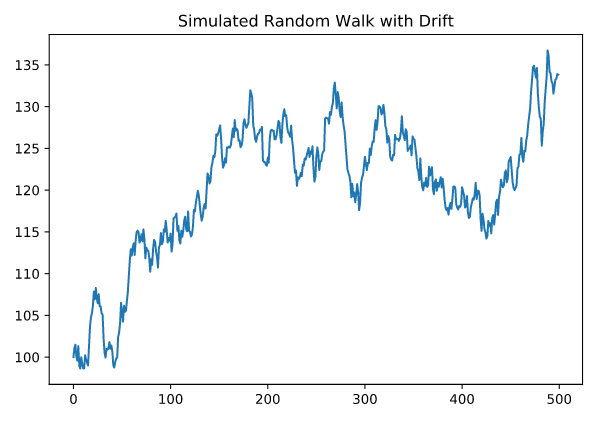

# Are Stock Prices a Random Walk?
Most stock prices follow a random walk (perhaps with a drift). You will look at a time series of Amazon stock prices, pre-loaded in the DataFrame AMZN, and run the 'Augmented Dickey-Fuller Test' from the statsmodels library to show that it does indeed follow a random walk.

With the ADF test, the "null hypothesis" (the hypothesis that we either reject or fail to reject) is that the series follows a random walk. Therefore, a low p-value (say less than 5%) means we can reject the null hypothesis that the series is a random walk.

Instructions

1. Import the adfuller module from statsmodels.

2. Run the Augmented Dickey-Fuller test on the series of closing stock prices, which is the column 'Adj Close' in the AMZN DataFrame.

3. Print out the entire output, which includes the test statistic, the p-values, and the critical values for tests with 1%, 10%, and 5% levels.

4. Print out just the p-value of the test (results[0] is the test statistic, and results[1] is the p-value).

In [ ]:
# Import the adfuller module from statsmodels
from statsmodels.tsa.stattools import adfuller

# Run the ADF test on the price series and print out the results
results = adfuller(AMZN['Adj Close'])
print(results)

# Just print out the p-value
print('The p-value of the test on prices is: ' + str(results[1]))

'''
<script.py> output:
    (4.025168525770738, 1.0, 33, 5054, {'1%': -3.4316445438146865, '5%': -2.862112049726916, '10%': -2.5670745025321304}, 30308.64216426981)
    The p-value of the test on prices is: 1.0
'''

Conclusion

According to this test, we cannot reject the hypothesis that Amazon prices follow a random walk. In the next exercise, you'll look at Amazon returns.

# How About Stock Returns?
In the last exercise, you showed that Amazon stock prices, contained in the DataFrame AMZN follow a random walk. In this exercise. you will do the same thing for Amazon returns (percent change in prices) and show that the returns do not follow a random walk.

Instructions

1. Import the adfuller module from statsmodels.

2. Create a new DataFrame of AMZN returns by taking the percent change of prices using the method .pct_change().

3. Eliminate the NaN in the first row of returns using the .dropna() method on the DataFrame.

4. Run the Augmented Dickey-Fuller test on the 'Adj Close' column of AMZN_ret, and print out the p-value in results[1].

In [ ]:
# Import the adfuller module from statsmodels
from statsmodels.tsa.stattools import adfuller

# Create a DataFrame of AMZN returns
AMZN_ret = AMZN.pct_change()

# Eliminate the NaN in the first row of returns
AMZN_ret = AMZN_ret.dropna()

# Run the ADF test on the return series and print out the p-value
results = adfuller(AMZN_ret['Adj Close'])
print('The p-value of the test on returns is: ' + str(results[1]))

'''
<script.py> output:
    The p-value of the test on returns is: 2.565589808348029e-22
'''

Conclusion

The p-value is extremely small, so we can easily reject the hypothesis that returns are a random walk at all levels of significance.

# Stationarity

1. Stationarity
There are different ways to define stationarity,

2. What is Stationarity?
but in its strictest sense, it means that the joint distribution of the observations do not depend on time. A less restrictive version of stationarity, and one that is easier to test, is weak stationarity, which just means that the mean, variance, and autocorrelations of the observations do not depend on time. In other words, for the autocorrelation, the correlation between X-t and X-(t-tau) is only a function of the lag tau, and not a function of time.

3. Why Do We Care?
If a process is not stationary, then it becomes difficult to model. Modeling involves estimating a set of parameters, and if a process is not stationary, and the parameters are different at each point in time, then there are too many parameters to estimate. You may end up having more parameters than actual data! So stationarity is necessary for a parsimonious model, one with a smaller set of parameters to estimate.

4. Examples of Nonstationary Series
A random walk is a common type of non-stationary series. The variance grows with time. For example, if stock prices are a random walk, then the uncertainty about prices tomorrow is much less than the uncertainty 10 years from now.

5. Examples of Nonstationary Series
Seasonal series are also non-stationary. Here is the dataset you saw earlier on the frequency of Google searches for the word 'diet'. The mean varies with the time of the year.

6. Examples of Nonstationary Series
Here is White Noise, which would ordinarily be a stationary process, but here the mean increases over time, which makes it non-stationary.

7. Transforming Nonstationary Series Into Stationary Series
Many non-stationary series can be made stationary through a simple transformation. A Random Walk is a non-stationary series, but if you take the first differences, the new series is White Noise, which is stationary. On the left are S&P500 prices, which is a non-stationary random walk, but if you compute first differences on the right, it becomes a stationary white noise process.

8. Transforming Nonstationary Series Into Stationary Series
On the left, we have the quarterly earnings for H&R Block, which has a large seasonal component and is therefore not stationary. If we take the seasonal difference, by taking the difference with lag of 4, the transformed series looks stationary.

9. Transforming Nonstationary Series Into Stationary Series
Sometimes, you may need to make two transformations. Here is a time series of Amazon's quarterly revenue. It is growing exponentially as well as exhibiting a strong seasonal pattern. First, if you take only the log of the series, in the upper right, you eliminate the exponential growth. But if you take both the log of the series and then the seasonal difference, in the lower right, the transformed series looks stationary.

10. Let's practice!
Now let's try some examples.

# Is it Stationary?

Here are four time series plots:

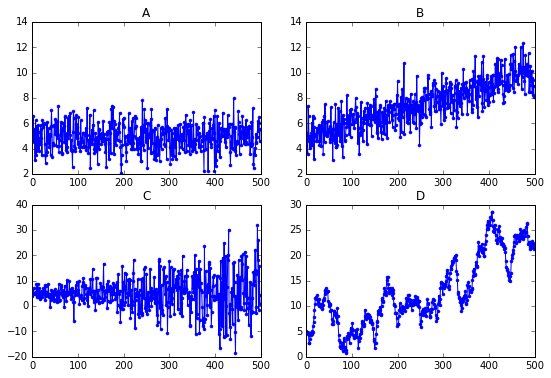

# Which one is stationary?

**Incorrect Answers**

B
 - Not stationary because the mean increases over time

C
 - Not stationary because the volatility increases over time

D
 - This is a random walk, which is not stationary

**Correct Answer**

A
 - Well done! This is white noise, which is stationary.

# Seasonal Adjustment During Tax Season

Many time series exhibit strong seasonal behavior. The procedure for removing the seasonal component of a time series is called seasonal adjustment. For example, most economic data published by the government is seasonally adjusted.

You saw earlier that by taking first differences of a random walk, you get a stationary white noise process. For seasonal adjustments, instead of taking first differences, you will take differences with a lag corresponding to the periodicity.

Look again at the ACF of H&R Block's quarterly earnings, pre-loaded in the DataFrame HRB, and there is a clear seasonal component. The autocorrelation is high for lags 4,8,12,16,… because of the spike in earnings every four quarters during tax season. Apply a seasonal adjustment by taking the fourth difference (four represents the periodicity of the series). Then compute the autocorrelation of the transformed series.

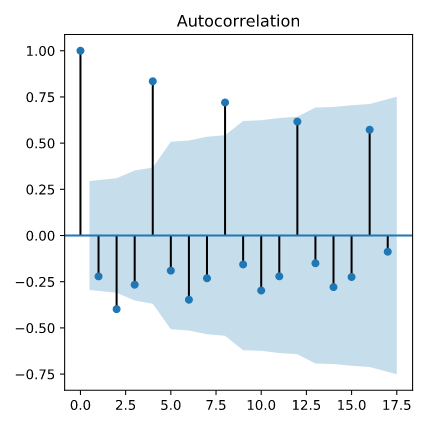

Instructions

1. Create a new DataFrame of seasonally adjusted earnings by taking the lag-4 difference of quarterly earnings using the .diff() method.

2. Examine the first 10 rows of the seasonally adjusted DataFrame and notice that the first four rows are NaN.

3. Drop the NaN rows using the .dropna() method.

4. Plot the autocorrelation function of the seasonally adjusted DataFrame.

In [ ]:
# Import the plot_acf module from statsmodels
from statsmodels.graphics.tsaplots import plot_acf

# Seasonally adjust quarterly earnings
HRBsa = HRB.diff(4)

# Print the first 10 rows of the seasonally adjusted series
print(HRBsa.head(10))

# Drop the NaN data in the first four rows
HRBsa = HRBsa.dropna()

# Plot the autocorrelation function of the seasonally adjusted series
plot_acf(HRBsa)
plt.show()

'''
<script.py> output:
             Earnings
    Quarter          
    2007Q1        NaN
    2007Q2        NaN
    2007Q3        NaN
    2007Q4        NaN
    2008Q1       0.02
    2008Q2      -0.04
    2008Q3      -0.05
    2008Q4       0.26
    2009Q1      -0.05
    2009Q2       0.02
'''

Conclusion

By seasonally adjusting the series, we eliminated the seasonal pattern in the autocorrelation function

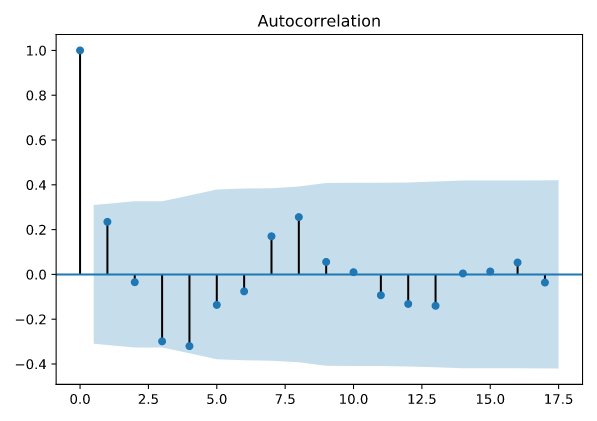